In [1]:
# %matplotlib notebook
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from aamaas.etl import FEWS as fewsWAM

from scipy.optimize import curve_fit


In [2]:
def get_time_series(par_ids, loc_ids, filter_id, modinst_id, start, end):
    """Get a timeseries with a query from the FEWS database using fewsWAM
    
    Parameters
    ----------
    par_ids : str
    loc_ids : str
    filter_id : str
    start : datetime
    end : datetime
    """
    source_data = fewsWAM.get_fews_dict(
        location_id=loc_ids,
        parameter_id=par_ids,
        filter_id=filter_id,
        start_time=start,
        end_time=end,
        moduleInstanceIds = modinst_id,
    )

    if source_data is not None:
        reeks = fewsWAM.series_from_dict(source_data)
        if reeks is not None:
            return reeks
        else:
            print(f"Er is geen reeks in de data voor {loc_ids}: {par_ids}")    
    else:
        print(f"Er is geen data voor  {loc_ids}: {par_ids}: ")

Lijst met locatie en bijbehorende parameter, filter en module ID in csv bestand zetten en inlezen

In [3]:
lijst = pd.read_csv('//am011/Groups/O en M/01. Projecten/Projecten lopend/Python Scripts/Dynamisch Beekdal/lijst_debietmeetpunten.csv', sep = ';')
# lijst = pd.read_csv('H:\Mijn Documenten\Python\Dynamisch Beekdal/lijst_debietmeetpunten.csv', sep = ';')

lijst

Location_ID Parameter_ID     Filter_ID         Module_ID  \
0                     ADCP211     Q.meting  Hydronet_Uur    Aggregeren_uur   
1                      ADM120     Q.meting  Hydronet_Uur    Aggregeren_uur   
2                        201B   Q.afgeleid  Hydronet_Uur    Aggregeren_uur   
3   RWSPoeldonk_debiet_totaal   Q.afgeleid  Hydronet_RWS  Debiet_Berekenen   
4                    ADCP202A     Q.meting  Hydronet_Uur    Aggregeren_uur   
5                201B_beneden     H.meting  Hydronet_Uur    Aggregeren_uur   
6            206PLD_uitstroom     H.meting  Hydronet_Uur    Aggregeren_uur   
7                   DYNA025_O     H.meting  Hydronet_Uur    Aggregeren_uur   
8                   DYNA026_O     H.meting  Hydronet_Uur    Aggregeren_uur   
9                   DYNA027_O     H.meting  Hydronet_Uur    Aggregeren_uur   
10               211A_beneden     H.meting  Hydronet_Uur    Aggregeren_uur   
11                204B_debiet   Q.afgeleid  Hydronet_Uur    Aggregeren_uur   

    aggregate  
0       False  
1       False  
2       False  
3        True  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False  
10      False  
11      False

Data inladen. Poeldonk is minuut data dus moet nog geresampled worden. Dit wordt met een True or falFalse aangegeven in de kolom "aggregate".
Resultaat data is een dictionary.

In [9]:
data = {}
start = pd.datetime(2015,1,1)
end = pd.datetime(2022,6,1)

for _,row in lijst.iterrows():
    print(row['Location_ID'])
    datain = get_time_series(row['Parameter_ID'],row['Location_ID'],row['Filter_ID'],row['Module_ID'], start,end)
    if row['aggregate']:
        datain = datain.resample('H').mean()
    try:
        data[row['Location_ID']] = datain['value']
    except:
        pass
Data = pd.DataFrame(data)       

C:\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
C:\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


ADCP211
ADM120
201B
RWSPoeldonk_debiet_totaal
ADCP202A
201B_beneden
206PLD_uitstroom
DYNA025_O
Er is geen data voor  DYNA025_O: H.meting: 
DYNA026_O
Er is geen data voor  DYNA026_O: H.meting: 
DYNA027_O
Er is geen data voor  DYNA027_O: H.meting: 
211A_beneden
204B_debiet


Dictionary "data" omzetten naar dataFrame "Data". 

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63859 entries, 2015-01-01 00:00:00 to 2022-04-14 18:00:00
Freq: H
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ADCP211                    62217 non-null  float32
 1   ADM120                     62260 non-null  float32
 2   201B                       62574 non-null  float32
 3   RWSPoeldonk_debiet_totaal  61776 non-null  float32
 4   ADCP202A                   21801 non-null  float32
 5   201B_beneden               62702 non-null  float32
 6   206PLD_uitstroom           55854 non-null  float32
 7   211A_beneden               63716 non-null  float32
 8   204B_debiet                63379 non-null  float32
dtypes: float32(9)
memory usage: 2.7 MB


In [11]:
Data['In'] = Data[['ADCP211', '201B']].sum(axis=1)
Data['Uit'] = Data['ADM120']-Data[['204B_debiet','RWSPoeldonk_debiet_totaal']].sum(axis=1)
Data['year'] = Data.index.year

Middels onderstaande stukje script kun je de Q-H relaties plotten. Je moet wel zelf nog de gewenste locaties en jaren invoeren.

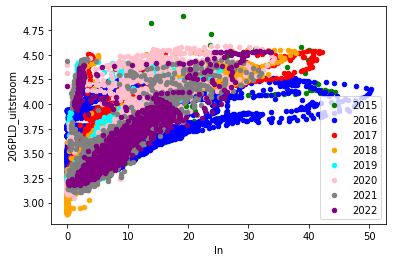

In [13]:
fig,ax = plt.subplots()
kleuren = ['green','blue','red','orange','cyan','pink', 'grey','purple']
tel = 0
for yy in ['2015','2016','2017','2018', '2019', '2020', '2021', '2022']:
    Data.loc[str(yy),['206PLD_uitstroom','In']].plot.scatter(x='In', y='206PLD_uitstroom', ax=ax, color = kleuren[tel], label = yy)
    tel+=1
plt.legend()